In [55]:
import tensorflow as tf
img_height, img_width, batch_size = 256, 256, 32
directory = 'kixbox_images'
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory, validation_split=0.4, subset='training',
  seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 2303 files belonging to 3 classes.
Using 1382 files for training.


In [56]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  directory, validation_split=0.4, subset='validation',
  seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 2303 files belonging to 3 classes.
Using 921 files for validation.


In [57]:
num_classes = len(train_ds.class_names)
print(f'class names: {train_ds.class_names}')
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

class names: ['accessories', 'clothing', 'shoes']
(32, 256, 256, 3)
(32,)


In [58]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [59]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [60]:
epochs = 6
his = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/6
44/44 [==============================] - 13s 267ms/step - loss: 1.8242 - accuracy: 0.7149 - val_loss: 0.2340 - val_accuracy: 0.9001
Epoch 2/6
44/44 [==============================] - 11s 247ms/step - loss: 0.0804 - accuracy: 0.9790 - val_loss: 0.0487 - val_accuracy: 0.9805
Epoch 3/6
44/44 [==============================] - 11s 250ms/step - loss: 0.0283 - accuracy: 0.9928 - val_loss: 0.0324 - val_accuracy: 0.9902
Epoch 4/6
44/44 [==============================] - 11s 240ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/6
44/44 [==============================] - 11s 247ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 6/6
44/44 [==============================] - 11s 245ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.0070 - val_accuracy: 0.9989


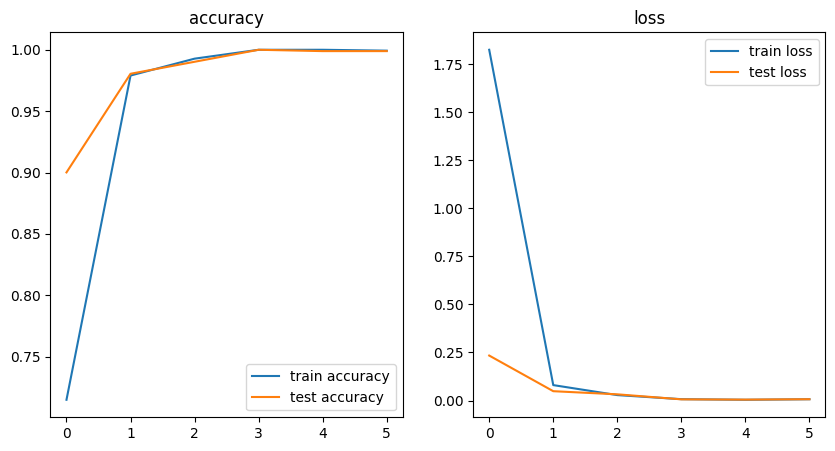

In [61]:
import matplotlib.pyplot as plt
acc, val_acc = his.history['accuracy'], his.history['val_accuracy']
loss, val_loss = his.history['loss'], his.history['val_loss']
epochs_range = range(epochs)
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=[10, 5])
axis[0].plot(epochs_range, acc, label='train accuracy')
axis[0].plot(epochs_range, val_acc, label='test accuracy')
axis[0].legend()
axis[0].set_title('accuracy')
axis[1].plot(epochs_range, loss, label='train loss')
axis[1].plot(epochs_range, val_loss, label='test loss')
axis[1].legend()
axis[1].set_title('loss')
plt.show()